<a href="https://colab.research.google.com/github/meow-codes201/learn-deep-learning-in-pytorch/blob/main/pyTorchWorkFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np


weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
x = torch.arange(start,end,step).unsqueeze(1)
y = weight * x + bias

In [37]:
train_split = int(0.8 * len(x))
x_train,y_train = x[:train_split],y[:train_split]
x_test,y_test = x[train_split:],y[train_split:]
len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

In [38]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c="b",s=4,label="Training Data")
    plt.scatter(test_data,test_labels,c="g",s=4,label="Testing Data")
    if predictions is not None:
        plt.scatter(test_data,predictions,c="r",s=4)
    plt.legend(prop={"size":16})



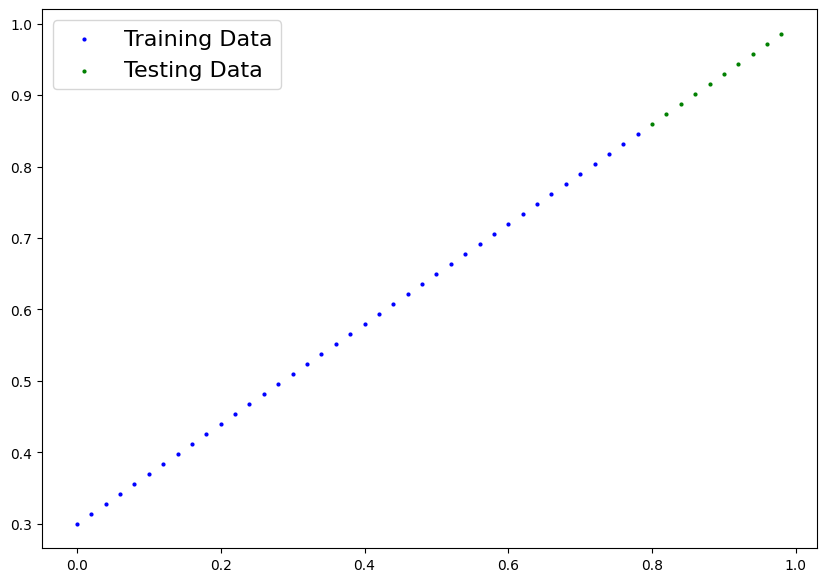

In [39]:
plot_predictions()

In [40]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
      super().__init__()
      self.weights = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
      self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)

    def forward(self,x:torch.Tensor)->torch.Tensor:
      return self.weights * x + self.bias

In [41]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [42]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [43]:
x_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [44]:
with torch.inference_mode():
  y_preds = model_0(x_test)


In [45]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [46]:
# Check the predictions
print(f"Number of testing samples: {len(x_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")


Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


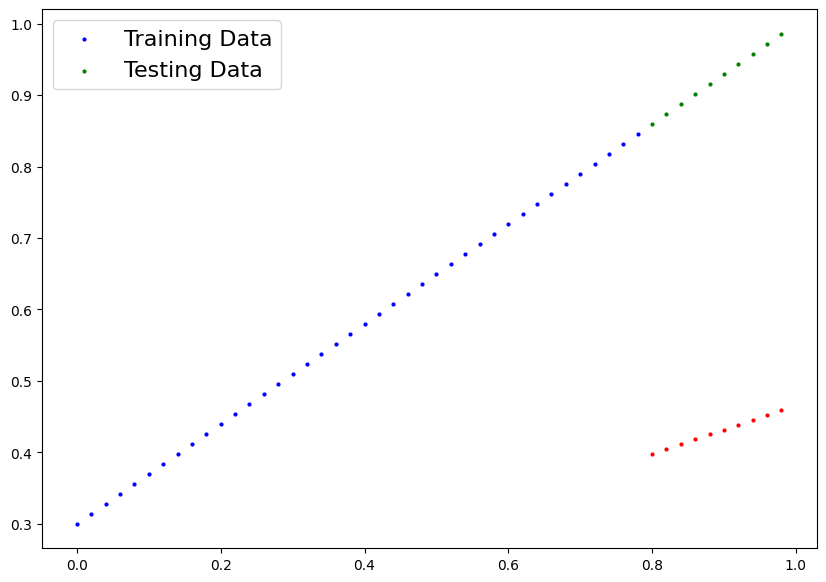

In [47]:
plot_predictions(predictions=y_preds)

In [48]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [49]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)


In [69]:
torch.manual_seed(42)
epochs = 100
train_loss_values = []
test_loss_values = []
epoch_count =[]

for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(x_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(x_test)
    test_loss = loss_fn(test_pred,y_test)
    if epoch %10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 10 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 20 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 30 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 40 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 50 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 60 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 70 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 80 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 90 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882


In [70]:
print(f"Model 0 state dict: {model_0.state_dict()}")

Model 0 state dict: OrderedDict({'weights': tensor([0.6990]), 'bias': tensor([0.3093])})


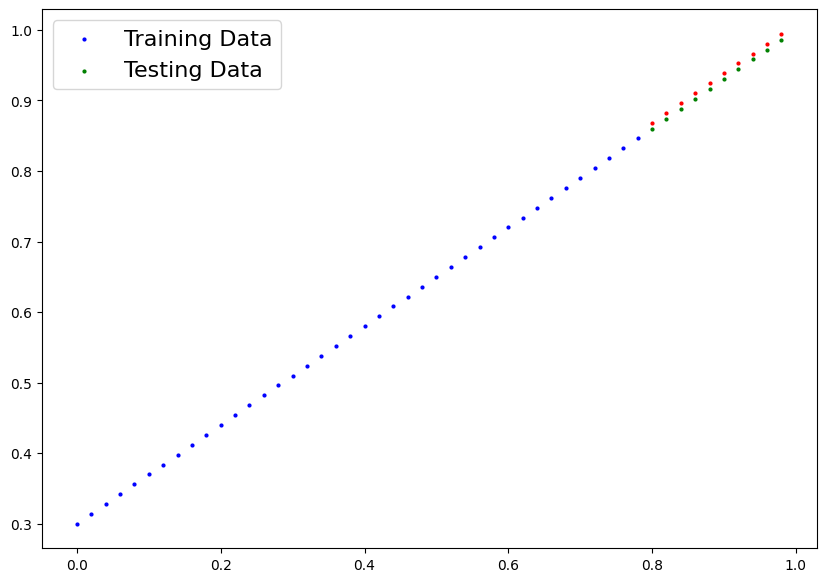

In [71]:
plot_predictions(predictions=test_pred)

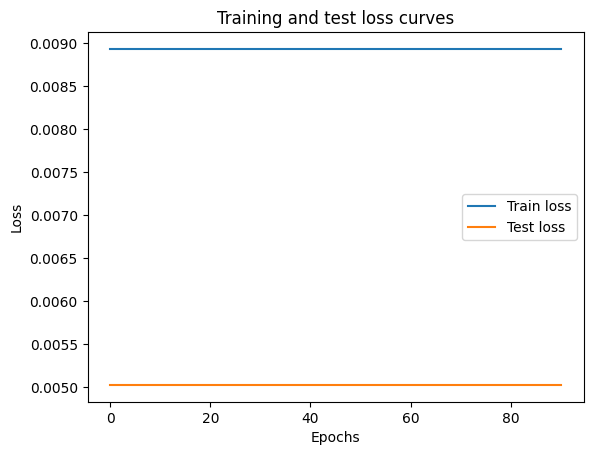

In [72]:
plt.plot(epoch_count,train_loss_values,label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()